# DATA PREPARATION #

In [4]:
import pandas as pd

# Correct the file path string
file_path = r'E:\My Games\traffic.csv'
# Load the dataset
traffic_data = pd.read_csv(file_path)

In [6]:
traffic_data

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [7]:
# Inspect the dataset
print(traffic_data.head())
print(traffic_data.info())
print(traffic_data.describe())

              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
           Junction      Vehicles            ID
count  48120.000000  48120.000000  4.812000e+04
mean       2.180549     22.791334  2.016330e+10
std        0.966955     20.750063  5.944854e+06
min        1.000000      1.000000  2.015110e+10
25%        1.000000      9.000000

In [8]:
# Convert DateTime column to datetime format
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])

# Extract features
traffic_data['Hour'] = traffic_data['DateTime'].dt.hour
traffic_data['DayOfWeek'] = traffic_data['DateTime'].dt.dayofweek

# Inspect the first few rows of the cleaned data
traffic_data.head()

,DateTime,Junction,Vehicles,ID,Hour,DayOfWeek
0,2015-11-01 00:00:00,1,15,20151101001,0,6
1,2015-11-01 01:00:00,1,13,20151101011,1,6
2,2015-11-01 02:00:00,1,10,20151101021,2,6
3,2015-11-01 03:00:00,1,7,20151101031,3,6
4,2015-11-01 04:00:00,1,9,20151101041,4,6


# EDA #

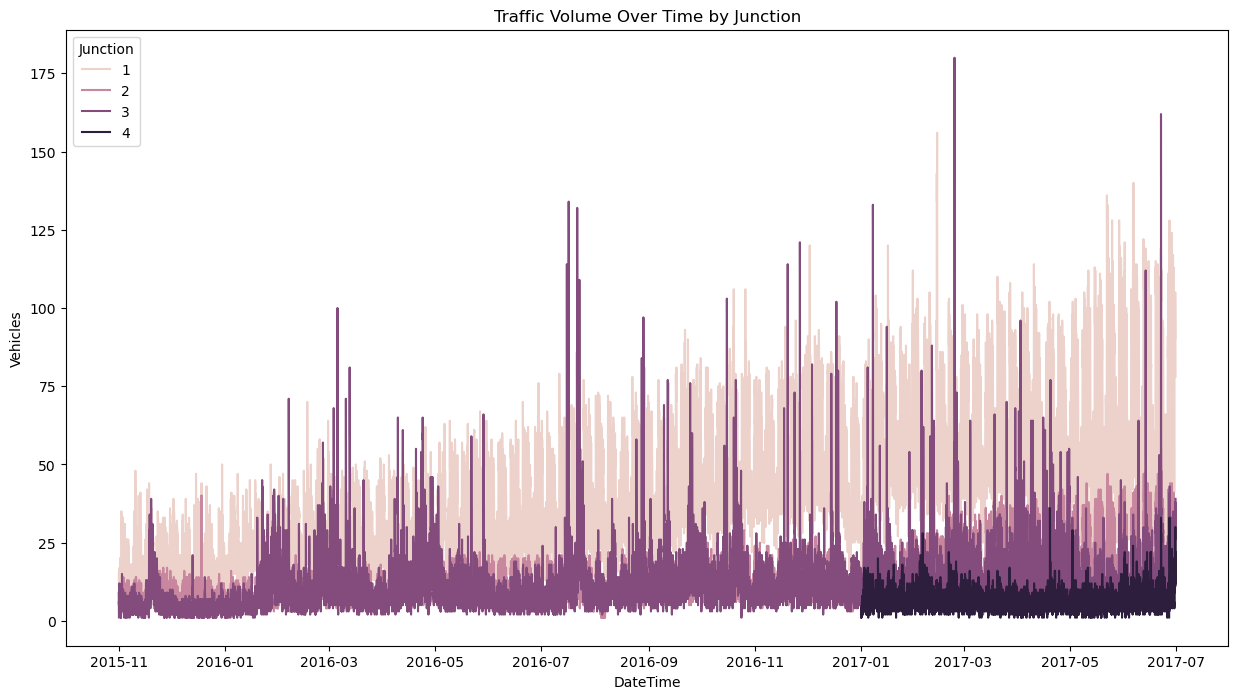

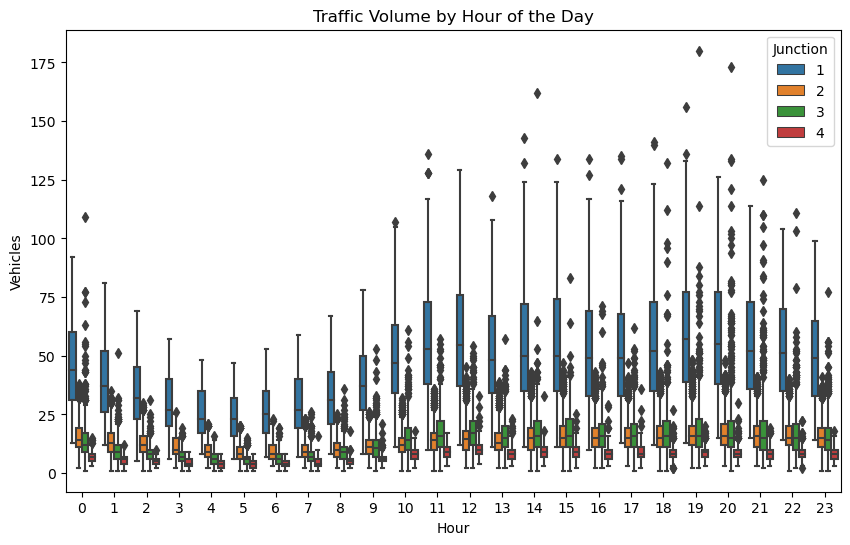

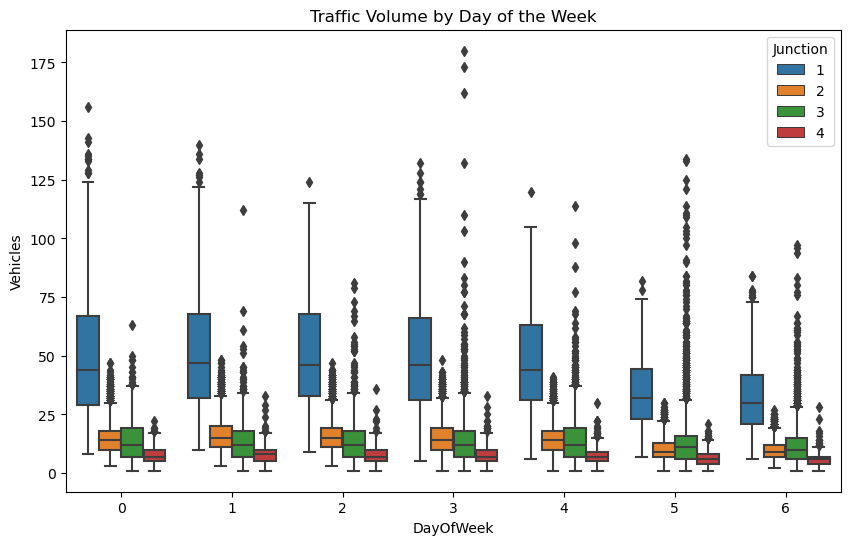

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot traffic volume over time for each junction
plt.figure(figsize=(15, 8))
sns.lineplot(data=traffic_data, x='DateTime', y='Vehicles', hue='Junction')
plt.title('Traffic Volume Over Time by Junction')
plt.show()

# Plot traffic volume by hour of the day
plt.figure(figsize=(10, 6))
sns.boxplot(data=traffic_data, x='Hour', y='Vehicles', hue='Junction')
plt.title('Traffic Volume by Hour of the Day')
plt.show()

# Plot traffic volume by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(data=traffic_data, x='DayOfWeek', y='Vehicles', hue='Junction')
plt.title('Traffic Volume by Day of the Week')
plt.show()


# FORECASTING TRAFFIC VOLUME USING TIME SERIES ANALYSIS #

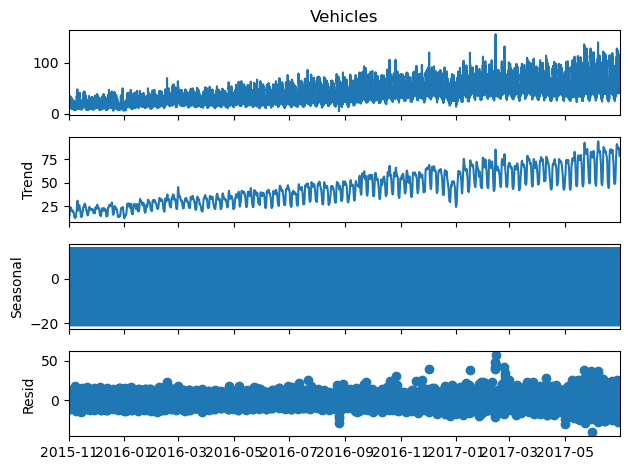

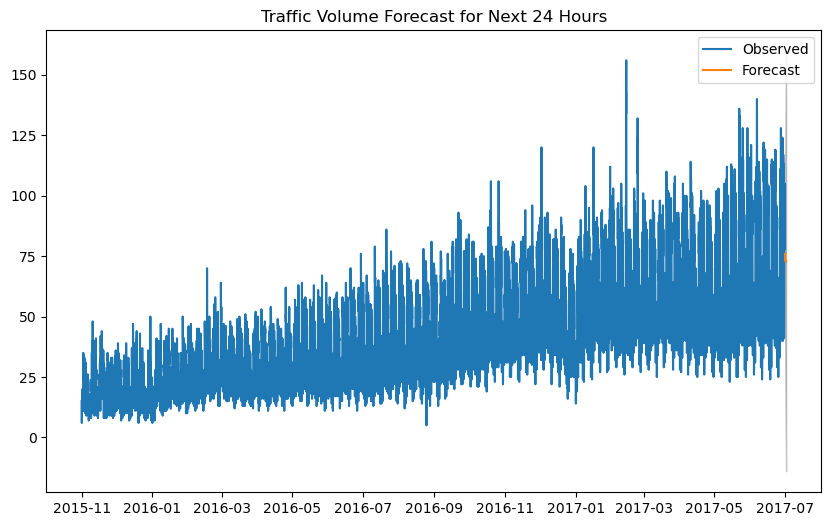

In [10]:
import statsmodels.api as sm

# Aggregate traffic data by hour for a specific junction
junction = 1  # Replace with the junction you're analyzing
junction_data = traffic_data[traffic_data['Junction'] == junction].set_index('DateTime')
junction_hourly = junction_data.resample('H').sum()

# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(junction_hourly['Vehicles'], model='additive')
fig = decomposition.plot()
plt.show()

# Fit ARIMA model for forecasting
model = sm.tsa.ARIMA(junction_hourly['Vehicles'], order=(1, 1, 1))
results = model.fit()

# Forecast future traffic volume
forecast = results.get_forecast(steps=24)  # Forecasting the next 24 hours
forecast_df = forecast.conf_int()
forecast_df['Forecast'] = results.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

plt.figure(figsize=(10, 6))
plt.plot(junction_hourly['Vehicles'], label='Observed')
plt.plot(forecast_df['Forecast'], label='Forecast')
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='k', alpha=0.2)
plt.title('Traffic Volume Forecast for Next 24 Hours')
plt.legend()
plt.show()


# SHORT-TERM MEASURES #
## Traffic Signal Optimization:
Optimize traffic signals based on real-time data to reduce waiting times and improve flow at congested junctions.


In [13]:
# This is a placeholder for actual traffic signal optimization logic
def optimize_traffic_signals(real_time_data):
    # Implement traffic signal optimization algorithm
    # Example: Adjust signal timing based on traffic volume
    optimized_signals = {}
    for junction, data in real_time_data.items():
        optimized_signals[junction] = adjust_signal_timing(data)
    return optimized_signals

def adjust_signal_timing(data):
    # Placeholder logic to adjust signal timing
    return {'green_time': 60, 'red_time': 30}  # Example values


## Enforcement of Traffic Rules:
Strengthen the enforcement of traffic rules, especially during peak hours, to ensure smooth traffic movement.

In [14]:
def enforce_traffic_rules(traffic_data):
    # Implement rule enforcement logic
    violations = detect_violations(traffic_data)
    impose_fines(violations)
    
def detect_violations(traffic_data):
    # Placeholder logic to detect traffic violations
    violations = {}
    for record in traffic_data:
        if record['speed'] > speed_limit(record['location']):
            violations[record['vehicle_id']] = 'Speeding'
    return violations

def impose_fines(violations):
    # Placeholder logic to impose fines
    for vehicle_id, violation in violations.items():
        print(f'Imposing fine for {violation} on vehicle {vehicle_id}')


## Promotion of Carpooling:
Encourage carpooling through awareness campaigns and dedicated carpool lanes.

In [15]:
def promote_carpooling(awareness_campaign, dedicated_lanes):
    # Implement carpooling promotion logic
    run_awareness_campaign(awareness_campaign)
    create_carpool_lanes(dedicated_lanes)

def run_awareness_campaign(campaign):
    # Placeholder logic for awareness campaign
    print(f'Running campaign: {campaign}')

def create_carpool_lanes(lanes):
    # Placeholder logic to create carpool lanes
    for lane in lanes:
        print(f'Creating carpool lane: {lane}')


## Improvement of Public Transport:
Enhance the frequency and reliability of public transport services to reduce the dependency on private vehicles.

In [16]:
def improve_public_transport(transport_data):
    # Implement public transport improvement logic
    increased_frequency = increase_frequency(transport_data)
    improve_reliability(transport_data)
    return increased_frequency

def increase_frequency(transport_data):
    # Placeholder logic to increase frequency of public transport
    return {route: freq + 1 for route, freq in transport_data.items()}

def improve_reliability(transport_data):
    # Placeholder logic to improve reliability
    for route in transport_data:
        print(f'Improving reliability for route: {route}')


# LONG-TERM STRATEGIES

## Dynamic Congestion Pricing:
Implement dynamic congestion pricing to discourage the use of private vehicles during peak hours and in highly congested areas.

In [17]:
def implement_congestion_pricing(pricing_data):
    # Implement dynamic congestion pricing logic
    pricing_scheme = calculate_dynamic_pricing(pricing_data)
    apply_pricing(pricing_scheme)

def calculate_dynamic_pricing(data):
    # Placeholder logic to calculate dynamic pricing
    return {area: base_price + congestion_level(data, area) for area, base_price in data.items()}

def apply_pricing(pricing_scheme):
    # Placeholder logic to apply pricing
    for area, price in pricing_scheme.items():
        print(f'Applying price {price} in area {area}')


## Infrastructure Development:
Invest in the development and maintenance of road infrastructure, including the expansion of key roads and construction of flyovers.

In [18]:
def develop_infrastructure(infrastructure_projects):
    # Implement infrastructure development logic
    for project in infrastructure_projects:
        print(f'Starting project: {project}')
        # Add project-specific development logic here


## Development of New Modes of Transport:
Explore and invest in new modes of transport such as metro rail, monorail, and dedicated bus lanes to provide efficient alternatives to road transport.

In [19]:
def develop_new_transport_modes(transport_modes):
    # Implement new transport modes development logic
    for mode in transport_modes:
        print(f'Investing in: {mode}')
        # Add mode-specific development logic here


## Smart Traffic Management Systems:
Implement smart traffic management systems using IoT and AI to monitor and manage traffic in real-time.

In [20]:
def implement_smart_traffic_management(iot_data, ai_models):
    # Implement smart traffic management logic
    for data, model in zip(iot_data, ai_models):
        optimize_traffic(data, model)

def optimize_traffic(data, model):
    # Placeholder logic to optimize traffic using IoT and AI
    print(f'Optimizing traffic using model: {model}')


# RISKS AND MITIGATION MEASURES 

## Public Resistance to Change:
Conduct extensive awareness and consultation campaigns to explain the benefits of proposed changes and ensure public buy-in.

In [21]:
def manage_public_resistance(campaigns):
    # Implement public resistance management logic
    for campaign in campaigns:
        run_awareness_campaign(campaign)


## Implementation and Maintenance Costs:
Secure adequate funding and develop a phased implementation plan to manage costs effectively.

In [22]:
def manage_costs(funding_sources, implementation_plan):
    # Implement cost management logic
    secure_funding(funding_sources)
    develop_phased_plan(implementation_plan)

def secure_funding(sources):
    # Placeholder logic to secure funding
    for source in sources:
        print(f'Securing funding from: {source}')

def develop_phased_plan(plan):
    # Placeholder logic to develop phased plan
    print(f'Developing phased plan: {plan}')


## Equitable Access to Transportation:
Ensure that the proposed changes do not disproportionately affect vulnerable populations and provide alternative solutions where necessary.

In [23]:
def ensure_equitable_access(transport_changes, alternatives):
    # Implement equitable access logic
    for change, alternative in zip(transport_changes, alternatives):
        print(f'Ensuring equitable access for change: {change} with alternative: {alternative}')
